# Descriptive statistics problems

### Exercise 1

We will use NumPy to obtain information to describe statistically.

- Generate an array of 100 elements following a normal distribution.
- Generate an array of 100 elements following a chi-square distribution with 3 degrees of freedom.
- Calculate the main metrics and statistical measures that best describe the two vectors.

In [17]:
# TODO
import numpy as np

np.random.seed(42)

normal_vector = np.random.normal(size=100)
chi_square_vector = np.random.chisquare(df=3, size=100)

print(f"Normal Vector: {normal_vector}\n\n")
print(f"Chi-square Vector: {chi_square_vector}")


Normal Vector: [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189

In [18]:
from collections import Counter
from scipy.stats import skew, kurtosis

# Measures of central tendency
def central_tendency_measures(data):
    """
    Calculate measures of central tendency.
    """
    mean = np.mean(data)
    median = np.median(data)
    mode = Counter(data).most_common(1)[0][0]
    return mean, median, mode

# Measures of dispersion
def dispersion_measures(data):
    """
    Calculate measures of dispersion
    """
    variance = np.var(data)
    std_dev = np.std(data)
    data_range = np.ptp(data)
    return variance, std_dev, data_range

# Function for shape measures
def shape_measures(data):
    """
    Calculate measures of shape
    """
    skewness = skew(data)
    excess_kurtosis = kurtosis(data)  # Excess kurtosis
    return skewness, excess_kurtosis

# Function to display all metrics for a dataset
def display_metrics(data, name):
    """
    Display all metrics for a given dataset.
    """
    mean, median, mode = central_tendency_measures(data)
    variance, std_dev, data_range = dispersion_measures(data)
    skewness, excess_kurtosis = shape_measures(data)

    print(f"Metrics for {name}:")
    print(f"  Mean: {mean:.4f}")
    print(f"  Median: {median:.4f}")
    print(f"  Mode: {mode:.4f}")
    print(f"  Variance: {variance:.4f}")
    print(f"  Standard Deviation: {std_dev:.4f}")
    print(f"  Range: {data_range:.4f}")
    print(f"  Skewness: {skewness:.4f}")
    print(f"  Kurtosis: {excess_kurtosis:.4f}")
    print("-" * 40)

    return mean, median, mode, variance, std_dev, data_range, skewness, excess_kurtosis

# Display metrics for both arrays
metrics_normal = display_metrics(normal_vector, "Normal Distribution")
metrics_chi_square = display_metrics(chi_square_vector, "Chi-Square Distribution")

Metrics for Normal Distribution:
  Mean: -0.1038
  Median: -0.1270
  Mode: 0.4967
  Variance: 0.8165
  Standard Deviation: 0.9036
  Range: 4.4720
  Skewness: -0.1753
  Kurtosis: -0.1554
----------------------------------------
Metrics for Chi-Square Distribution:
  Mean: 2.9381
  Median: 2.4636
  Mode: 0.4169
  Variance: 5.8170
  Standard Deviation: 2.4118
  Range: 12.5921
  Skewness: 1.6684
  Kurtosis: 3.6206
----------------------------------------


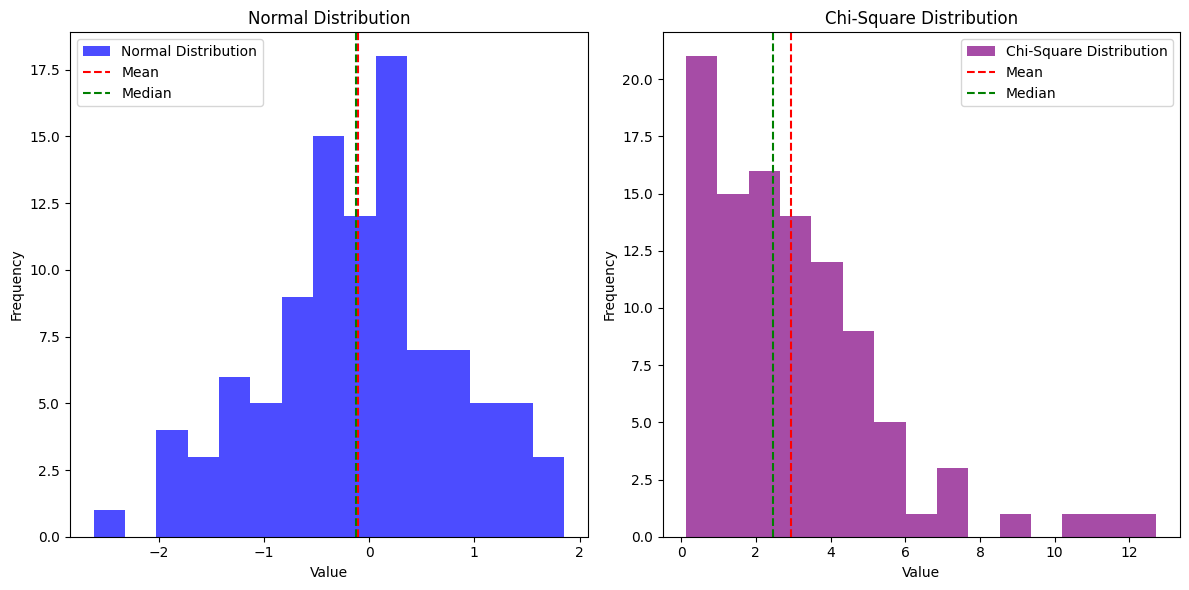

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Normal distribution
plt.subplot(1, 2, 1)
plt.hist(normal_vector, bins=15, color='blue', alpha=0.7, label='Normal Distribution')
plt.axvline(metrics_normal[0], color='red', linestyle='--', label='Mean')
plt.axvline(metrics_normal[1], color='green', linestyle='--', label='Median')
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Chi-square distribution
plt.subplot(1, 2, 2)
plt.hist(chi_square_vector, bins=15, color='purple', alpha=0.7, label='Chi-Square Distribution')
plt.axvline(metrics_chi_square[0], color='red', linestyle='--', label='Mean')
plt.axvline(metrics_chi_square[1], color='green', linestyle='--', label='Median')
plt.title("Chi-Square Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

### Comparison of the Distributions

Shape:

- The normal distribution is symmetric, with a skewness close to 0.
- The chi-square distribution is asymmetric, with a significant positive skew.

Spread:

- The normal distribution has a smaller range (4.4720) and lower variance (0.8165).
- The chi-square distribution is more spread out, with a higher range (12.5921) and variance (5.8170).

Tails:

- The normal distribution has light tails, with kurtosis close to 0.
- The chi-square distribution has heavy tails, with positive kurtosis.

Center:

- The normal distribution is centered around 0, with closely aligned mean, median, and mode.
- The chi-square distribution is centered around a positive value, with a mean higher than the median, reflecting its skewness.

### Exercise 2

Write a Python program to calculate the standard deviation of the following data:

```py
data = [4, 2, 5, 8, 6]
```

In [20]:
# TODO

import math

def calculate_standard_dev(data):
    """
    Calculate the standard deviation of a list of numbers
    """
    # Calculate the mean
    mean = sum(data) / len(data)

    # Calculate the squared differences from the mean
    squared_diff = [(x - mean) ** 2 for x in data]

    # Calculate the variance
    variance = sum(squared_diff) / (len(data) - 1)

    # Calculate the standard deviation
    std_dev = math.sqrt(variance)

    return std_dev


data = [4, 2, 5, 8, 6]
std_dev = calculate_standard_dev(data)

print(f"Sample Data: {data}")
print(f"Standard Deviation: {std_dev:.4f}")

Sample Data: [4, 2, 5, 8, 6]
Standard Deviation: 2.2361
